<a href="https://colab.research.google.com/github/aadarsh0404/marketprophecy/blob/main/NSEForecase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

In [25]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


# EDA

In [28]:
data.Date = pd.to_datetime(data.Date)

In [29]:
data = data.set_index('Date')

In [30]:
data.isnull().sum()

Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [31]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
mean,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,3.672148e+05
std,2605.404423,2613.649325,2588.183872,2602.005796,2602.005796,2.277599e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,9362.950195,9404.100098,9290.100097,9315.899902,9315.899902,1.956000e+05
50%,10781.849609,10816.349609,10718.750000,10769.150391,10769.150391,2.906000e+05
75%,11925.699707,11968.899903,11847.475097,11914.125000,11914.125000,5.092500e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


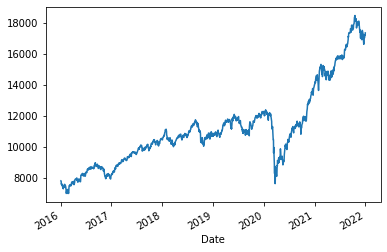

In [32]:
data.dropna().Close.plot()

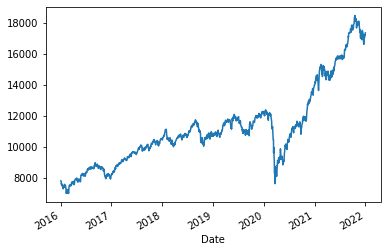

In [33]:
data.ffill().Close.plot()

In [34]:
data = data.ffill()

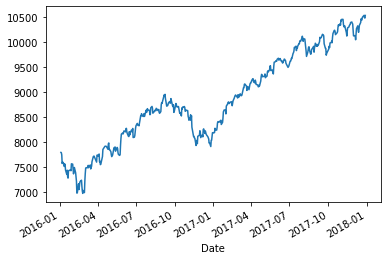

In [38]:
data['2016':'2017'].Close.plot()

In [41]:
import plotly.express as px

In [44]:
fig = px.line(data,y='Close',title='Closing Price of Stock')
fig.update_xaxes(rangeslider_visible=True)

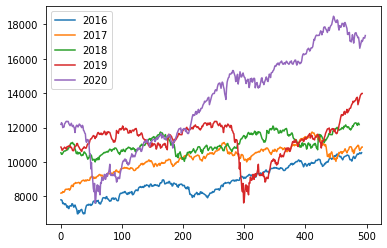

In [49]:
data['2016':'2017'].reset_index().Close.plot()
data['2017':'2018'].reset_index().Close.plot()
data['2018':'2019'].reset_index().Close.plot()
data['2019':'2020'].reset_index().Close.plot()
data['2020':'2021'].reset_index().Close.plot()
plt.legend(['2016','2017','2018','2019','2020','2021'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bb600eb10>,
      dtype=object)

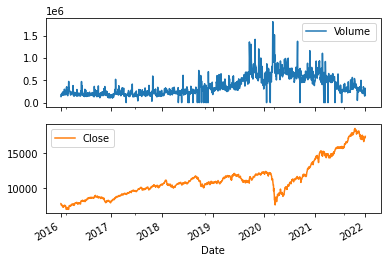

In [54]:
data[['Volume','Close']].plot(subplots=True)

In [55]:
data[['Volume','Close']].corr()

,Volume,Close
Volume,1.000000,0.241419
Close,0.241419,1.000000


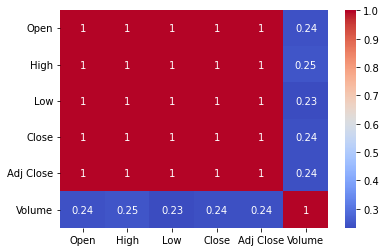

In [56]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

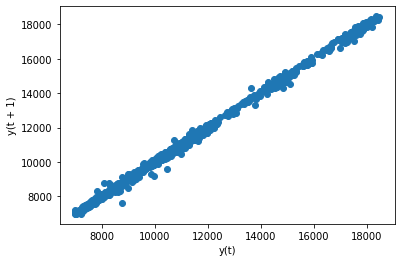

In [57]:
pd.plotting.lag_plot(data.Close,lag=1)

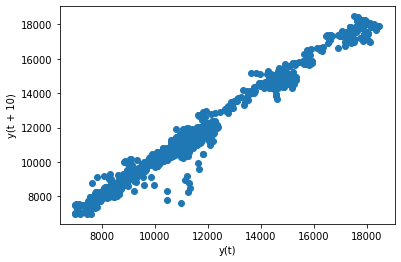

In [58]:
pd.plotting.lag_plot(data.Close,lag=10)

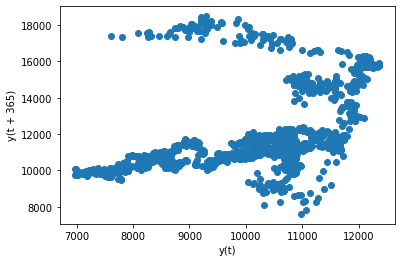

In [60]:
pd.plotting.lag_plot(data.Close,lag=365)

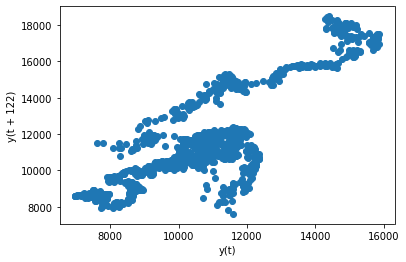

In [66]:
pd.plotting.lag_plot(data.Close,lag=(122))

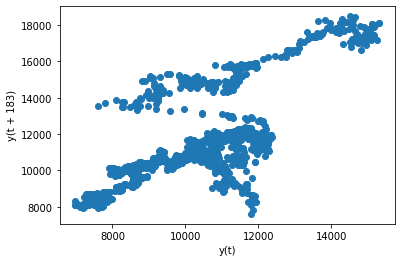

In [67]:
pd.plotting.lag_plot(data.Close,lag=(183))

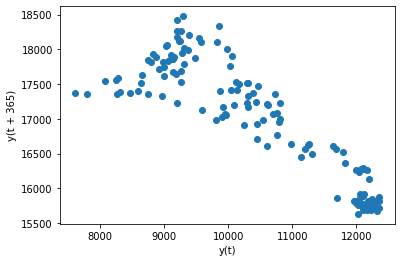

In [233]:
pd.plotting.lag_plot(data['2020':'2022'].Close,lag=(365))

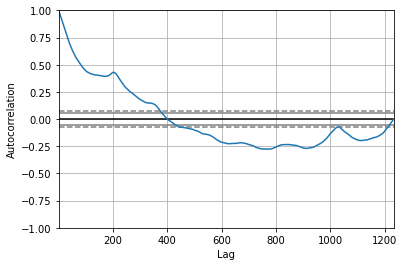

In [72]:
pd.plotting.autocorrelation_plot(data['2016':'2020'].Close)

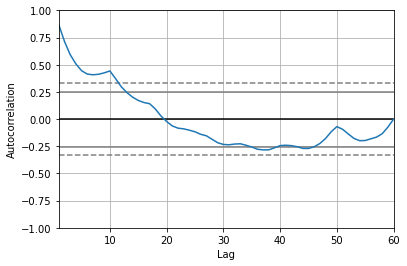

In [78]:
pd.plotting.autocorrelation_plot(data['2016':'2020'].Close.resample('1m').mean())

# Moving Average

In [79]:
from statsmodels.tsa.stattools import adfuller

In [85]:
# Simple Moving Average
data['Moving_Average_Rolling'] = data.Close.rolling(window=3).mean().shift(1)

In [88]:
data[['Moving_Average_Rolling','Close']]

,Moving_Average_Rolling,Close
Date,,
2016-01-04,NaN,7791.299805
2016-01-05,NaN,7784.649902
2016-01-06,NaN,7741.000000
2016-01-07,7772.316569,7568.299805
2016-01-08,7697.983236,7601.350098
...,...,...
2021-12-27,17010.599609,17086.250000
2021-12-28,17054.199870,17233.250000
2021-12-29,17107.750000,17213.599609


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



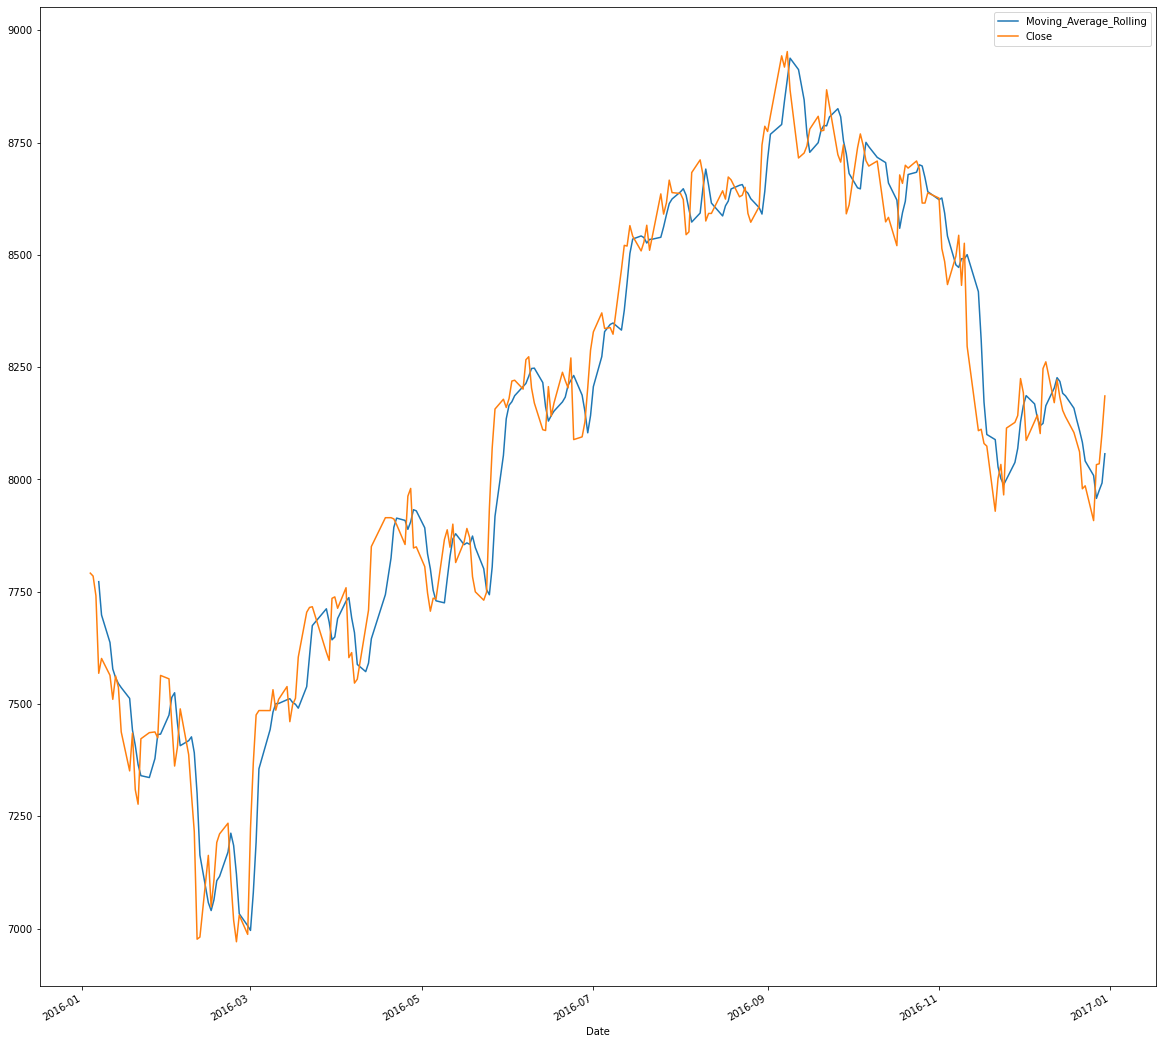

In [110]:

data[['Moving_Average_Rolling','Close']]['2016'].plot(figsize=(20,20))

In [103]:
# Exponential Moving Average
data['Exponential_Moving_Average'] = data.Close.ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [104]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Moving_Average_Rolling,Exponential_Moving_Average
Date,,,,,,,,
2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0,NaN,NaN
2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0,NaN,7791.299805
2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0,NaN,7787.974853
2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0,7772.316569,7764.487427
2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0,7697.983236,7666.393616


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



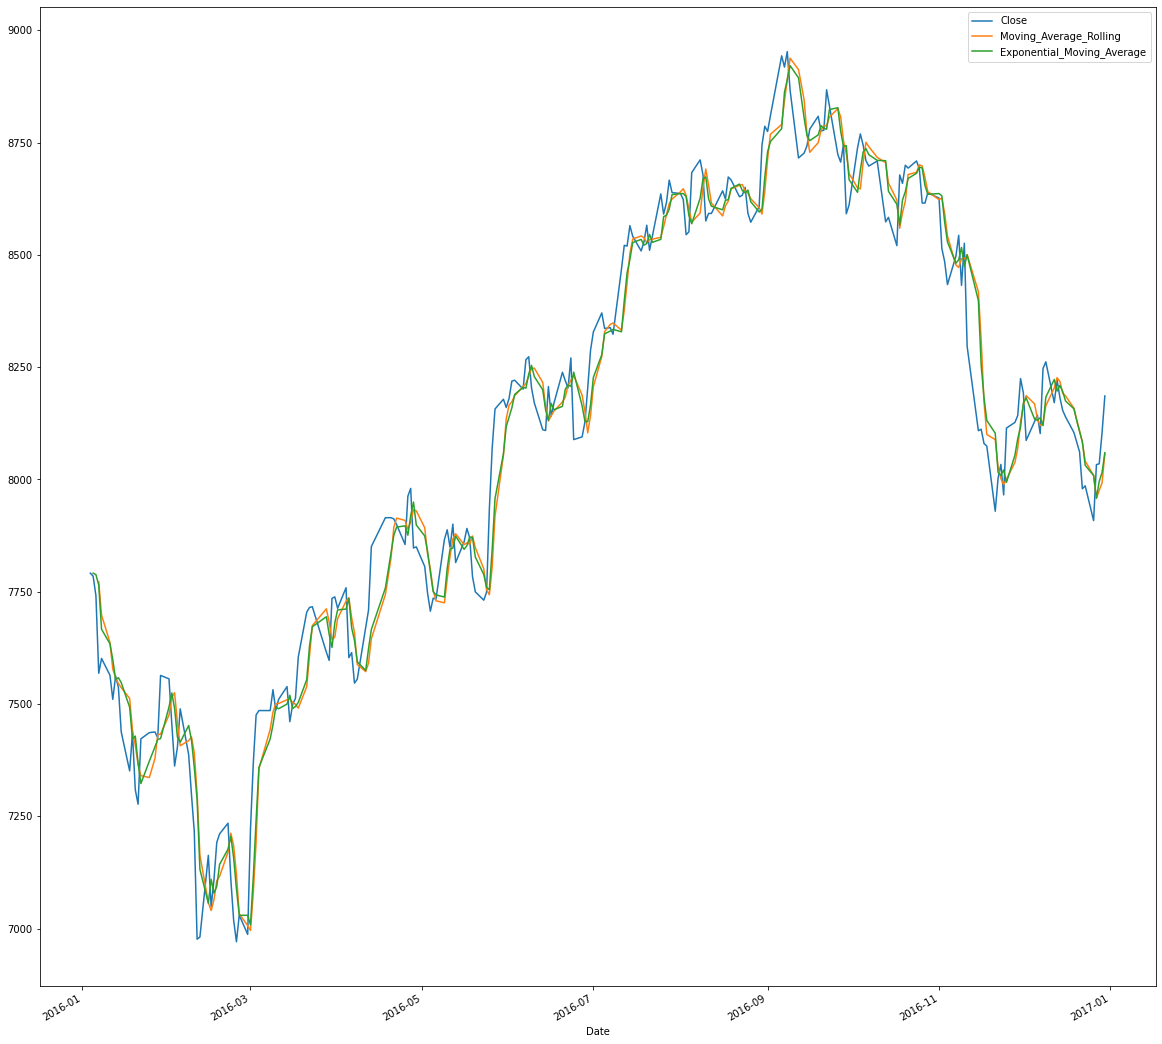

In [109]:
data[['Close','Moving_Average_Rolling','Exponential_Moving_Average']]['2016'].plot(figsize=(20,20))

In [111]:
# Exponential Smoothing Average
data['Exponential_Smoothing_Average'] = data.Close.ewm(alpha=0.7, adjust=False, min_periods=0).mean().shift(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



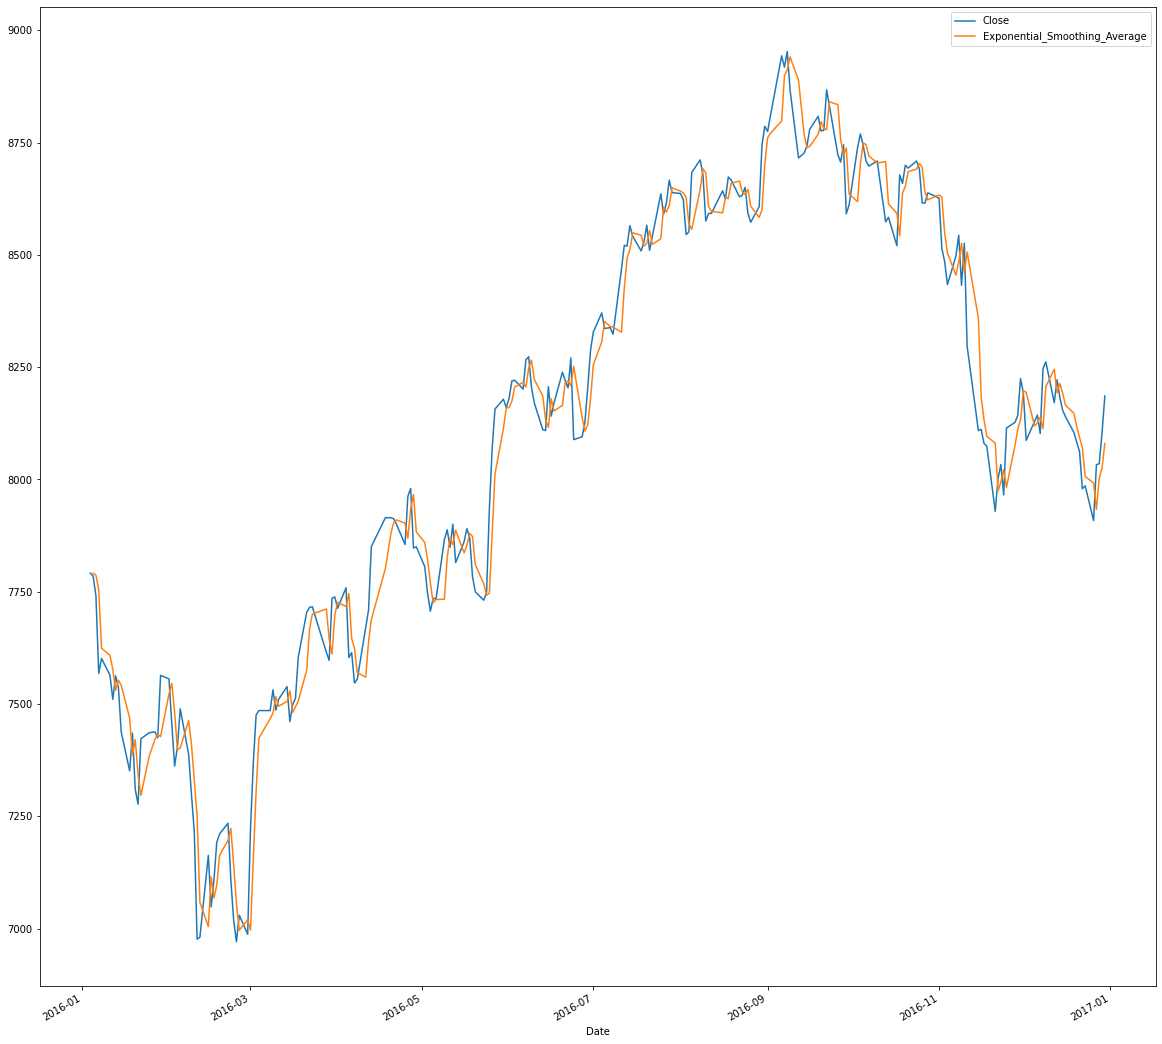

In [114]:
data[['Close','Exponential_Smoothing_Average']]['2016'].plot(figsize=(20,20))

In [115]:
data[['Close','Moving_Average_Rolling','Exponential_Moving_Average','Exponential_Smoothing_Average']]['2016']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



,Close,Moving_Average_Rolling,Exponential_Moving_Average,Exponential_Smoothing_Average
Date,,,,
2016-01-04,7791.299805,NaN,NaN,NaN
2016-01-05,7784.649902,NaN,7791.299805,7791.299805
2016-01-06,7741.000000,NaN,7787.974853,7786.644873
2016-01-07,7568.299805,7772.316569,7764.487427,7754.693462
2016-01-08,7601.350098,7697.983236,7666.393616,7624.217902
...,...,...,...,...
2016-12-26,7908.250000,8008.716634,8008.632333,7992.004438
2016-12-27,8032.850098,7957.700033,7958.441167,7933.376331
2016-12-28,8034.850098,7975.616699,7995.645632,8003.007968


In [116]:
from sklearn.metrics import mean_squared_error

In [126]:
print(((data.Close-data.Moving_Average_Rolling)**2).mean()**0.5)
print(((data.Close-data.Exponential_Moving_Average)**2).mean()**0.5)
print(((data.Close-data.Exponential_Smoothing_Average)**2).mean()**0.5)

150.0576210735703
138.999407670274
125.80144077401413


In [133]:
test = pd.read_csv('NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv')
test = test.set_index("Date")

In [134]:
# Exponential Smoothing Average
test['Exponential_Smoothing_Average'] = test.Close.ewm(alpha=0.7, adjust=False, min_periods=0).mean().shift(1)

In [136]:
test[['Close','Exponential_Smoothing_Average']].iloc[-1]

Close                            17560.199219
Exponential_Smoothing_Average    17691.798275
Name: 2022-02-03, dtype: float64

In [137]:
data_prophet = data.copy(deep=True)

In [143]:
data_prophet = data_prophet.rename({'Close':'y'},axis=1).drop(['Open','High','Low','Adj Close','Moving_Average_Rolling','Exponential_Moving_Average','Exponential_Smoothing_Average','Volume'],axis=1)

In [145]:
data_prophet['ds'] = data_prophet.index

In [146]:
data_prophet.head()

,y,ds
Date,,
2016-01-04,7791.299805,2016-01-04
2016-01-05,7784.649902,2016-01-05
2016-01-06,7741.000000,2016-01-06
2016-01-07,7568.299805,2016-01-07
2016-01-08,7601.350098,2016-01-08


In [150]:
from fbprophet import Prophet
model = Prophet()
model.fit(data_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [159]:
future = model.make_future_dataframe(periods=150)
future.tail()

,ds
1626,2022-05-26
1627,2022-05-27
1628,2022-05-28
1629,2022-05-29
1630,2022-05-30


In [160]:
forecast = model.predict(future)

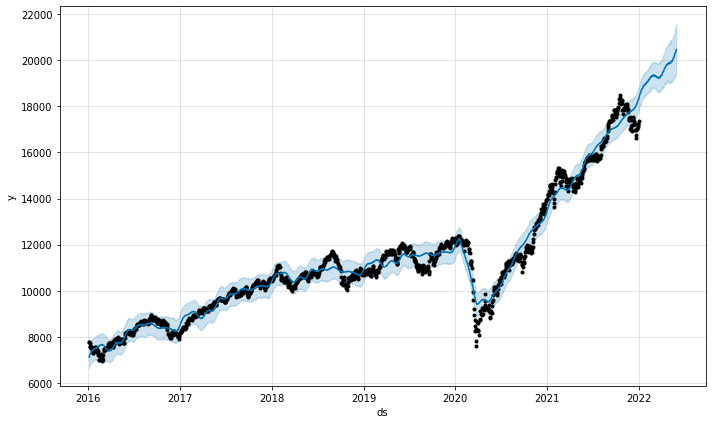

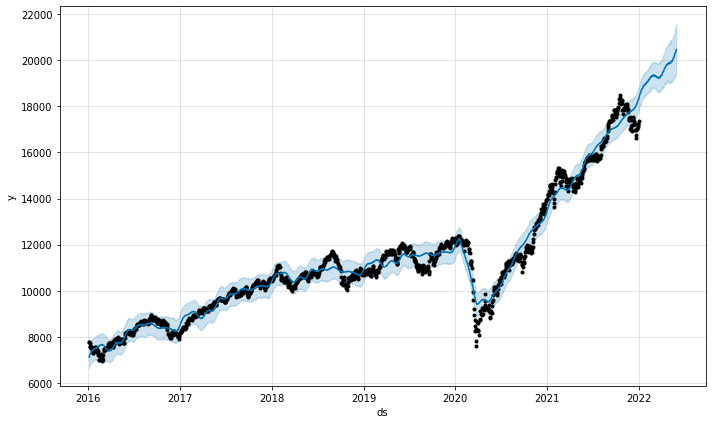

In [161]:
model.plot(forecast)

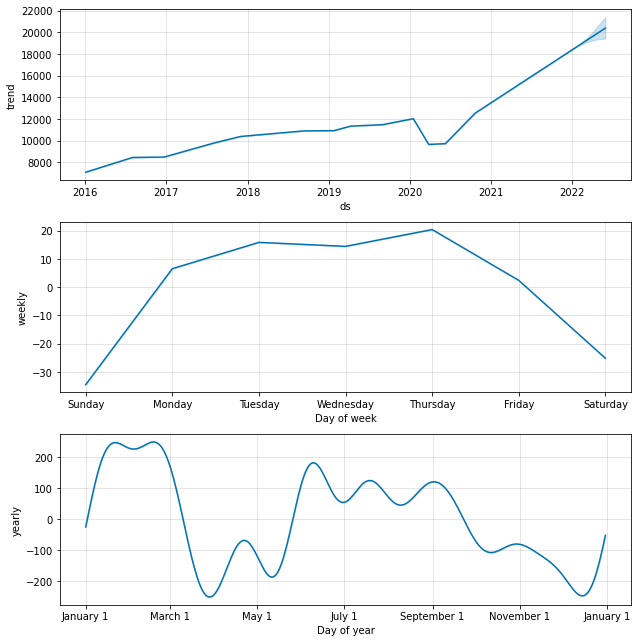

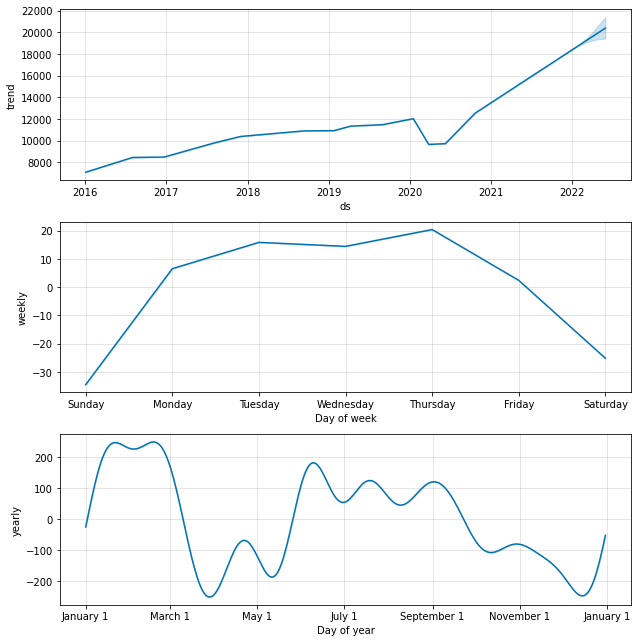

In [162]:
model.plot_components(forecast)

In [163]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

In [170]:
forecast = forecast.set_index('ds')

In [181]:
forecast['2022']['2022-01-03':'2022-02-03'].tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2022-01-30,18769.236754,18436.597627,19465.569623,18750.384494,18801.095247,196.424998,196.424998,196.424998,-34.533825,-34.533825,-34.533825,230.958823,230.958823,230.958823,0.0,0.0,0.0,18965.661752
2022-01-31,18782.614006,18506.918694,19503.972830,18760.332429,18817.422711,235.492201,235.492201,235.492201,6.543232,6.543232,6.543232,228.948969,228.948969,228.948969,0.0,0.0,0.0,19018.106206
2022-02-01,18795.991257,18558.888271,19555.644823,18772.227889,18832.581462,243.170805,243.170805,243.170805,15.873499,15.873499,15.873499,227.297306,227.297306,227.297306,0.0,0.0,0.0,19039.162062
2022-02-02,18809.368508,18579.922877,19550.554162,18782.492308,18849.876945,240.537842,240.537842,240.537842,14.461223,14.461223,14.461223,226.076620,226.076620,226.076620,0.0,0.0,0.0,19049.906350
2022-02-03,18822.745759,18537.737675,19578.062469,18793.793444,18866.390939,245.751751,245.751751,245.751751,20.412399,20.412399,20.412399,225.339352,225.339352,225.339352,0.0,0.0,0.0,19068.497510


In [198]:
test = pd.read_csv('NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv')

In [199]:
test.Date = pd.to_datetime(test.Date)
test = test.set_index("Date")

In [204]:
(((forecast['2022']['2022-01-03':'2022-02-03'].yhat-test.Close)**2).mean())**0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



1158.2576967831505

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the r

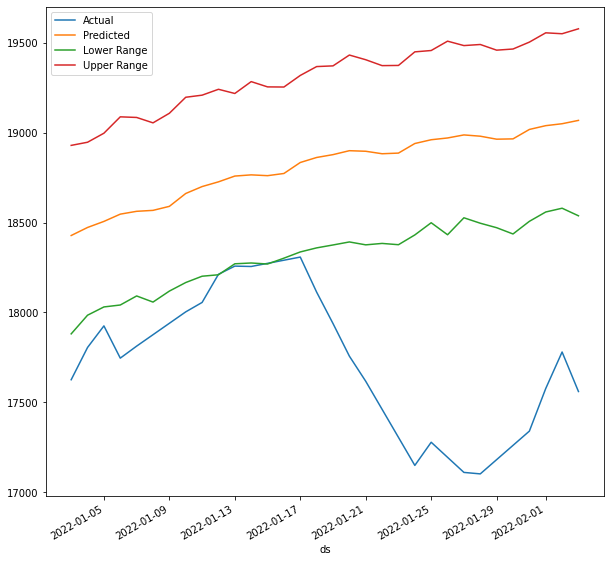

In [230]:
data.append(test)['2022'].Close.plot(figsize=(10,10))
forecast['2022']['2022-01-03':'2022-02-03'].yhat.plot(figsize=(10,10))
forecast['2022']['2022-01-03':'2022-02-03'].yhat_lower.plot(figsize=(10,10))
forecast['2022']['2022-01-03':'2022-02-03'].yhat_upper.plot(figsize=(10,10))
plt.legend(['Actual','Predicted','Lower Range','Upper Range'])